# GARCH Stock Forecasting

## Read Data

In [48]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [49]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [50]:
import yfinance as yf
tickerSymbol = 'DIS'
data = yf.Ticker(tickerSymbol)

# prices = data.history(start='2021-01-01', end='2021-04-01').Close

prices = data.history(start=start, end=end).Close
returns = 100*prices.pct_change().dropna()
print(returns.shape)

(1367,)


Text(0.5, 1.0, 'DIS Returns')

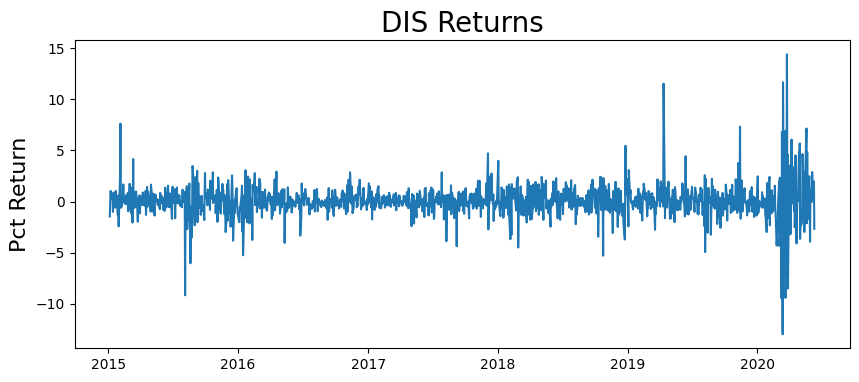

In [51]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

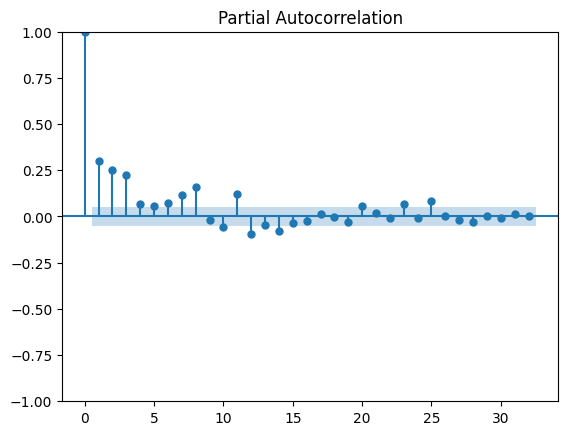

In [52]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [53]:
model = arch_model(returns, p=3, q=3)

In [54]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 228986975725.91626
Iteration:      2,   Func. Count:     22,   Neg. LLF: 972122531.1030519
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.9382715892416
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.364191421094
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2320.025234834019
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2338.290880599957
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2357.90420850187
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2398.177350228882
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2296.4525304939234
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2296.4436926998114
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2296.342544902272
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2296.324387500067
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2296.3075973837867
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2296.3

In [55]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2296.30
Distribution:                  Normal   AIC:                           4608.61
Method:            Maximum Likelihood   BIC:                           4650.37
                                        No. Observations:                 1367
Date:                Thu, Sep 11 2025   Df Residuals:                     1366
Time:                        21:58:01   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5563e-03  4.300e-02 -5.945e-02      0.953 [-8.683e-02,8.172e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5478      0.189      2.895  3.788e-03    [  0.177,  0.919]
alpha[1]       0.0681  3.919e-02      1.738  8.227e-02 [-8.712e-03,  0.145]
alpha[2]       0.2036  9.664e-02      2.107  3.509e-02  [1.424e-02,  0.393]
alpha[3]       0.3208      0.151      2.118  3.418e-02  [2.392e-02,  0.618]
beta[1]        0.0000      0.151      0.000      1.000    [ -0.295,  0.295]
beta[2]    1.8395e-14  9.814e-02  1.874e-13      1.000    [ -0.192,  0.192]
beta[3]        0.2242      0.153      1.464      0.143 [-7.597e-02,  0.524]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [56]:
model = arch_model(returns, p=3, q=0)

In [57]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3333.354986174764
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6665.566629267738
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1182168.491108087
Iteration:      4,   Func. Count:     31,   Neg. LLF: 191256.75613740477
Iteration:      5,   Func. Count:     38,   Neg. LLF: 7937.977110725164
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2543.2891107833016
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2455.4121403995728
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2312.383964176961
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2311.875338584181
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2311.2006853956855
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2311.1889784685536
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2311.1879831706815
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2311.187837751209
Iteration:     14,   Func. Count:     96,   Neg. LLF: 2311

In [58]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2311.19
Distribution:                  Normal   AIC:                           4632.38
Method:            Maximum Likelihood   BIC:                           4658.48
                                        No. Observations:                 1367
Date:                Thu, Sep 11 2025   Df Residuals:                     1366
Time:                        21:58:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.002e-02      0.357      0.721 [-6.414e-02,9.271e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8612      0.138      6.222  4.902e-10    [  0.590,  1.132]
alpha[1]       0.0869  4.455e-02      1.950  5.121e-02 [-4.570e-04,  0.174]
alpha[2]       0.2620  9.097e-02      2.880  3.981e-03  [8.366e-02,  0.440]
alpha[3]       0.3583      0.169      2.125  3.361e-02  [2.778e-02,  0.689]
===========================================================================

Covariance estimator: robust
"""

In [59]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [60]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

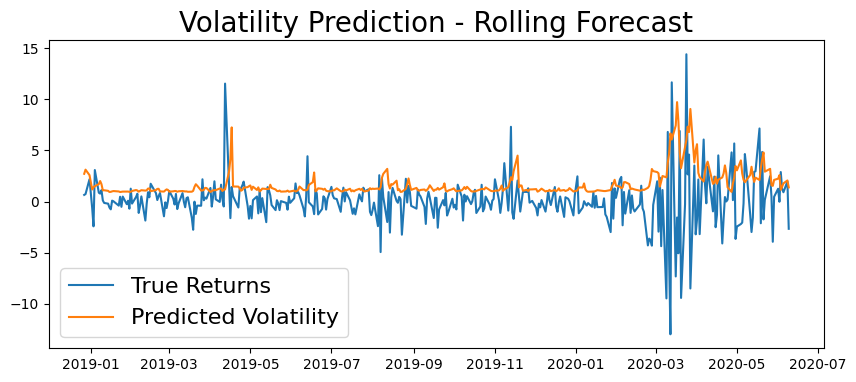

In [61]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [62]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [63]:
import yfinance as yf
tickerSymbol = 'SPY'
data = yf.Ticker(tickerSymbol)

prices = data.history(start=start, end=end).Close
returns = 100*prices.pct_change().dropna()
print(returns.shape)

(5140,)


Text(0.5, 1.0, 'SPY Returns')

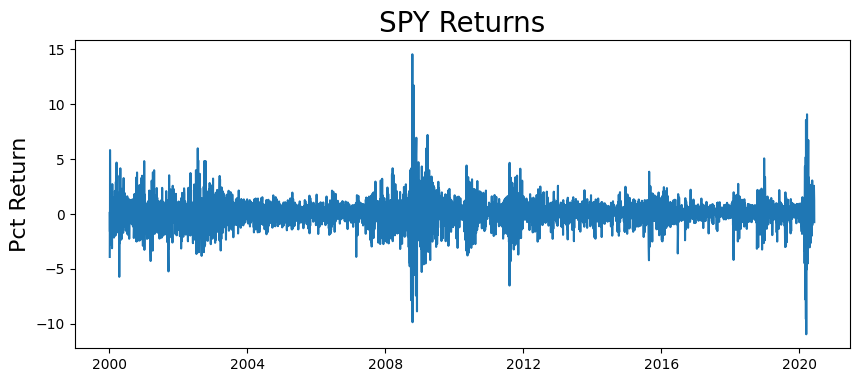

In [64]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

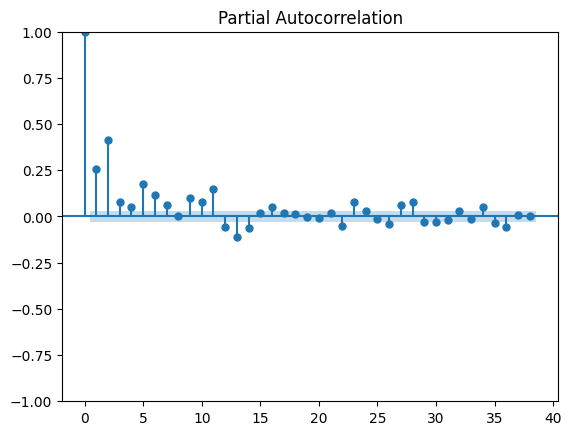

In [65]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [66]:
model = arch_model(returns, p=2, q=2)

In [67]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 94798.47762475848
Iteration:      2,   Func. Count:     21,   Neg. LLF: 63333.39670231337
Iteration:      3,   Func. Count:     33,   Neg. LLF: 11515.895586429879
Iteration:      4,   Func. Count:     42,   Neg. LLF: 9536.973628199477
Iteration:      5,   Func. Count:     51,   Neg. LLF: 7206.486750677049
Iteration:      6,   Func. Count:     59,   Neg. LLF: 7038.9010477836255
Iteration:      7,   Func. Count:     67,   Neg. LLF: 7041.542426504056
Iteration:      8,   Func. Count:     76,   Neg. LLF: 7035.814637951167
Iteration:      9,   Func. Count:     84,   Neg. LLF: 7034.109864975895
Iteration:     10,   Func. Count:     91,   Neg. LLF: 7034.107518593887
Iteration:     11,   Func. Count:     98,   Neg. LLF: 7034.107295263881
Iteration:     12,   Func. Count:    105,   Neg. LLF: 7034.10729401199
Iteration:     13,   Func. Count:    111,   Neg. LLF: 7034.107294011952
Optimization terminated successfully    (Exit mode 0)
         

In [68]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7034.11
Distribution:                  Normal   AIC:                           14080.2
Method:            Maximum Likelihood   BIC:                           14119.5
                                        No. Observations:                 5140
Date:                Thu, Sep 11 2025   Df Residuals:                     5139
Time:                        21:58:05   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0741  1.092e-02      6.787  1.148e-11 [5.271e-02,9.552e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0416  1.005e-02      4.142  3.437e-05 [2.193e-02,6.132e-02]
alpha[1]       0.0853  2.318e-02      3.680  2.337e-04   [3.986e-02,  0.131]
alpha[2]       0.1355  2.868e-02      4.727  2.282e-06   [7.934e-02,  0.192]
beta[1]        0.2550      0.292      0.874      0.382     [ -0.317,  0.827]
beta[2]        0.4943      0.258      1.919  5.492e-02  [-1.043e-02,  0.999]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [69]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [70]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

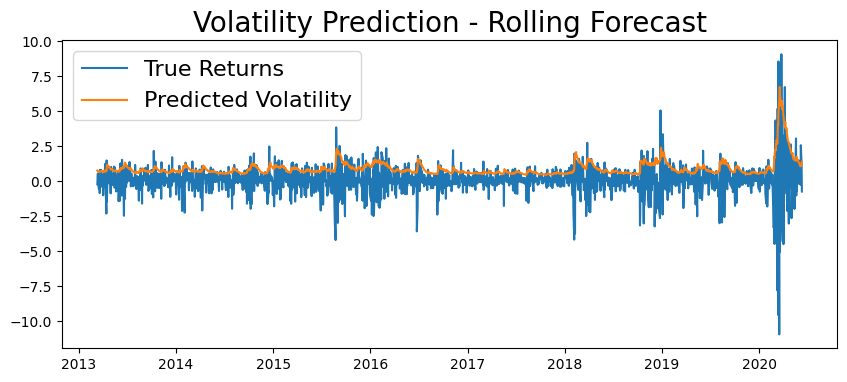

In [71]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [72]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [73]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

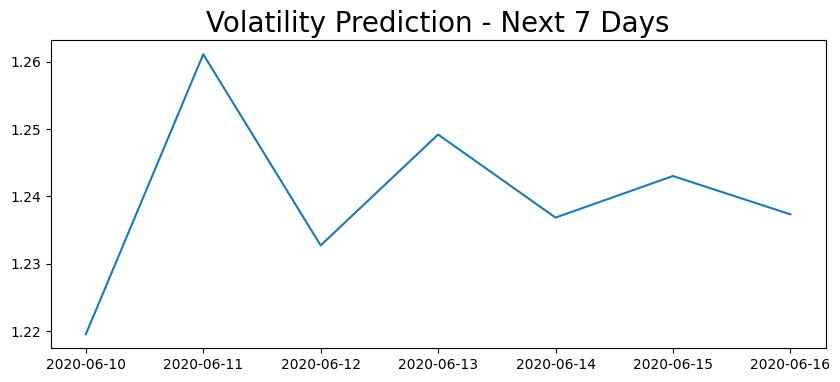

In [74]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)